# 강화학습
10000번 했을 때 9000번 이상 이기는 걸 목표로

In [3]:
import numpy as np
slot = np.random.rand()    # 랜덤값이 슬롯에 들어간다  <<  안보고 맞히고픔

In [8]:
# 맞히기위해서는 여러번 반복
box = []

for i in range(1000):
    if np.random.rand() <= slot:
        reward = 1
    else:
        reward = 0
    box.append(reward)

    print(sum(box) / (i+1))

# 게임기의 확률을 추론

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.0625
0.058823529411764705
0.05555555555555555
0.05263157894736842
0.05
0.047619047619047616
0.045454545454545456
0.043478260869565216
0.08333333333333333
0.12
0.11538461538461539
0.1111111111111111
0.10714285714285714
0.10344827586206896
0.1
0.0967741935483871
0.09375
0.09090909090909091
0.08823529411764706
0.11428571428571428
0.1111111111111111
0.10810810810810811
0.10526315789473684
0.10256410256410256
0.1
0.0975609756097561
0.09523809523809523
0.11627906976744186
0.13636363636363635
0.13333333333333333
0.13043478260869565
0.1276595744680851
0.125
0.12244897959183673
0.12
0.13725490196078433
0.1346153846153846
0.1320754716981132
0.12962962962962962
0.12727272727272726
0.125
0.12280701754385964
0.13793103448275862
0.15254237288135594
0.15
0.14754098360655737
0.14516129032258066
0.14285714285714285
0.15625
0.15384615384615385
0.15151515151515152
0.14925373134328357
0.16176470588235295
0.15942028985507245
0.17

In [9]:
slot

0.2383196017351893

### 박스 안에 있는 걸 다 더하는 게 너무 비효율적이다..... >> 이전확률로 다음확률 추론 가능

In [28]:
## Q = 0     # 전확률이 0
for i in range(1, 1001):
    if np.random.rand() <= slot:
        reward = 1
    else:
        reward = 0
    Q = Q + (reward - Q) / i       # 이전확률로 다음확률 추론
    print(Q)

0.0
0.0
0.0
0.0
0.2
0.33333333333333337
0.28571428571428575
0.25000000000000006
0.22222222222222227
0.20000000000000004
0.18181818181818185
0.16666666666666669
0.15384615384615385
0.14285714285714288
0.2
0.1875
0.17647058823529413
0.16666666666666669
0.15789473684210528
0.15000000000000002
0.14285714285714288
0.13636363636363638
0.13043478260869568
0.12500000000000003
0.12000000000000002
0.1153846153846154
0.11111111111111113
0.10714285714285716
0.10344827586206899
0.10000000000000002
0.09677419354838712
0.09375000000000003
0.09090909090909094
0.08823529411764709
0.08571428571428574
0.08333333333333336
0.0810810810810811
0.10526315789473686
0.10256410256410259
0.10000000000000002
0.09756097560975611
0.09523809523809526
0.09302325581395351
0.09090909090909094
0.11111111111111113
0.10869565217391307
0.10638297872340428
0.12500000000000003
0.12244897959183676
0.12000000000000002
0.11764705882352944
0.1153846153846154
0.11320754716981134
0.11111111111111113
0.1272727272727273
0.12500000000

In [29]:
slot

0.2383196017351893

## 오락실

In [57]:
# 강화학습 : 어떤 환경에 컴퓨터를 넣어놓는 것
# 오락실만들자
class Game:
    def __init__(self):
        self.rates = np.random.rand(10)

    def play(self, arm):
        rate = self.rates[arm]
        if rate >= np.random.rand():
            return 1
        else:
            return 0

game = Game()

In [58]:
for i in range(10):
    print(game.play(3))

1
1
0
1
1
1
1
1
0
0


In [59]:
# 0번째 슬롯의 확률 추론하기

Q = 0 
for i in range(1, 1001):
    if np.random.rand() <= game.rates[0]:
        reward = 1
    else:
        reward = 0
    Q = Q + (reward - Q) / i       # 이전확률로 다음확률 추론
    print(Q)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.0625
0.058823529411764705
0.05555555555555555
0.05263157894736842
0.1
0.09523809523809525
0.09090909090909091
0.08695652173913043
0.125
0.12
0.11538461538461538
0.1111111111111111
0.10714285714285714
0.10344827586206896
0.1
0.09677419354838711
0.09375000000000001
0.09090909090909093
0.08823529411764708
0.08571428571428573
0.08333333333333334
0.08108108108108109
0.07894736842105264
0.07692307692307693
0.07500000000000001
0.07317073170731708
0.07142857142857144
0.06976744186046513
0.09090909090909093
0.0888888888888889
0.08695652173913045
0.08510638297872342
0.08333333333333334
0.0816326530612245
0.08
0.0784313725490196
0.07692307692307693
0.07547169811320756
0.07407407407407408
0.07272727272727274
0.07142857142857144
0.07017543859649124
0.06896551724137932
0.06779661016949154
0.06666666666666668
0.0655737704918033
0.06451612903225808
0.0634920634920635
0.06250000000000001
0.07692307692307694
0.0757575757575757

In [60]:
Qs = np.zeros(10)
Ns = np.zeros(10)       # 각각의 게임기를 몇번썼는지

# 90% 확률로 내가 발견한 것 중에 가장 좋은 것을 사용함
# 10% 확률로는 랜덤으로 아무거나 해볼거임

for i in range(1001):
    action = np.random.randint(0, 10)
    reward = game.play(action)
    
    Ns[action] += 1
    Qs[action] += (reward - Qs[action]) / Ns[action]

Qs     # 각 게임의 승률을 기록

array([0.07627119, 0.625     , 0.73417722, 0.70192308, 0.12631579,
       0.51648352, 0.59615385, 0.80898876, 0.06666667, 0.96153846])

In [61]:
game.rates

array([0.09996063, 0.59456171, 0.77926639, 0.68367138, 0.12635879,
       0.44450812, 0.58572597, 0.76755369, 0.08600559, 0.95104295])

### 사람 

In [85]:
# 사람을 구현
class Agent:
    def __init__(self):       # 오락실 들어가기 전에는 게임한적도없고 확률도 모른다
        self.epsilon = 0.01 
        self.Qs = np.zeros(10)    # 게임기의 확률
        self.Ns = np.zeros(10)    # 게임기의 개수

    def update(self, action, reward):
        self.Ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.Ns[action]

    # 90% 확률로는 좋은 기계 쓸거고, 10% 확률로는 아무거나 쓸거임
    def get_action(self):
        if np.random.rand() <= self.epsilon:    # 10% 확률로 아무기계나
            return np.random.randint(0, 10)
        else:
            return np.argmax(self.Qs)         # 90% 확률로 발견한 것 중 가장 좋은 기계

### 확인

In [69]:
game = Game()
agent = Agent()
# 오락실 1개, 사람 1명 만듦

In [70]:
total_reward = 0
rates = []

for i in range(1, 10001):
    action = agent.get_action()
    reward = game.play(action)

    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / i)

In [71]:
total_reward

8591

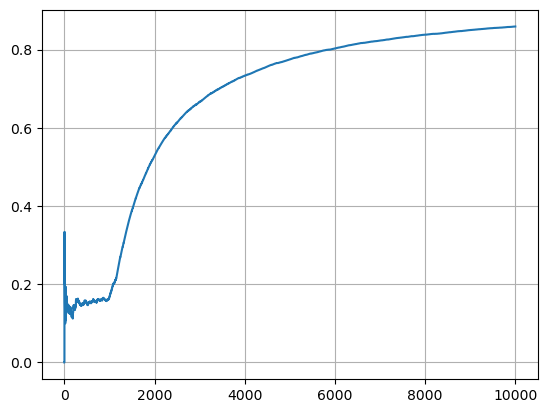

In [72]:
# 앱실론 1%, 10%, 30% 비교.....하면좋겟ㄴㄴ데구현은안햇음 
import matplotlib.pyplot as plt
plt.plot(rates)
plt.grid()
plt.show()

In [86]:
## 200번 반복하는 코드

runs = 200
step = 10000
all_rates = np.zeros((runs, step))

for run in range(runs):
    game = Game()
    agent = Agent()
    
    total_reward = 0
    rates = []

    for i in range(step):
        action = agent.get_action()
        reward = game.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (i+1))

    all_rates[run] = rates

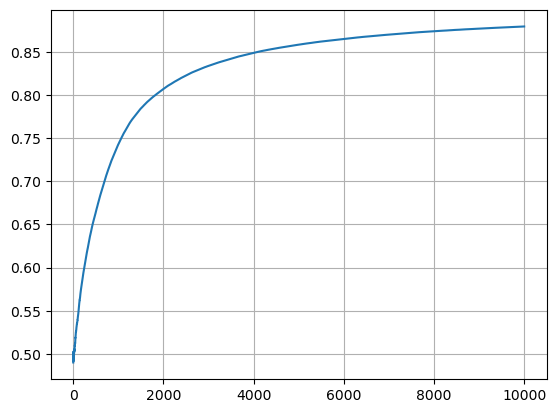

array([0.49      , 0.5025    , 0.49833333, ..., 0.87957441, 0.87957846,
       0.879583  ])

In [89]:
avg_rates = all_rates.mean(axis = 0)    # all_rates : 200번의 확률들이 저장되어 있음
plt.plot(avg_rates)
plt.grid()
plt.show()

# 200번 돌린거의 평균 봤을 때, 성능 거의 90%만큼 끌어올려짐
avg_rates

## 매 게임마다 전체 슬롯의 확률이 변한다면

In [185]:
class Game2:
    def __init__(self):
        self.rates = np.random.rand(10)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(10)     # 표준정규분포를 따르는 랜덤 값 * 0.1 한 걸 더해줌  =>  모든 값 다 조금씩 변함... 현재에 치중 가능 
        if rate >= np.random.rand():
            return 1
        else:
            return 0

In [186]:
class Agent2:
    def __init__(self):
        self.epsilon = 0.01 
        self.alpha = 0.7
        self.Qs = np.zeros(10)

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha         # 최근 데이터에 더 높은 가중치를 주겠다는 것

    def get_action(self):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, 10)
        else:
            return np.argmax(self.Qs)

In [187]:
game =  Game2()
agent = Agent2()

total_reward = 0
rates = []

# 게임 10000번 실행
for i in range(10000):
    action = agent.get_action()
    reward = game.play(action)
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (i+1))

In [190]:
total_reward

## 10000번 중에 9580번 이긴 것

9580

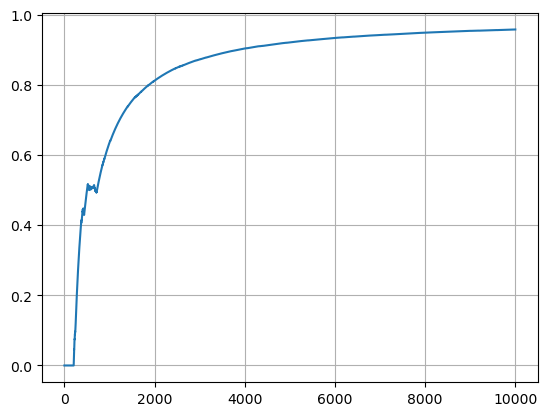

In [189]:
plt.plot(rates)
plt.grid()
plt.show()

## 최근 기준으로 좋은 성적을 보이는 주식 종목들을 찾으려 함

In [191]:
# !pip install Finance-Datareader
import FinanceDataReader as fdr
stocks = fdr.StockListing("KOSPI")
stocks

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,56800,1,600,1.07,56300,57300,56200,12870515,730318709208,336235433969600,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,207500,1,3000,1.47,205000,208500,203000,1775752,367619366000,151060490737500,728002365,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,1031000,2,-1000,-0.10,1023000,1043000,1023000,47043,48592230500,73380394000000,71174000,STK
3,373220,KR7373220003,LG에너지솔루션,KOSPI,,284500,2,-1500,-0.52,290500,291500,281500,174819,49864562250,66573000000000,234000000,STK
4,012450,KR7012450003,한화에어로스페이스,KOSPI,,835000,1,24000,2.96,822000,839000,821000,156208,130125590500,39492327835000,47296201,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,004415,KR7004411005,서울식품우,KOSPI,,1252,2,-6,-0.48,1278,1278,1240,1644,2054059,2785074000,2224500,STK
958,014915,KR7014911002,성문전자우,KOSPI,,4630,2,-30,-0.64,4655,4655,4630,12,55600,2778000000,600000,STK
959,001525,KR7001521004,동양우,KOSPI,,4240,1,170,4.18,4145,4240,4110,1307,5450085,2619179440,617731,STK
960,001527,KR7001522002,동양2우B,KOSPI,,8390,2,-20,-0.24,8470,8470,8300,243,2022280,2588893910,308569,STK


In [201]:
# 밴디트 알고리즘.

from tqdm import tqdm

total = []
for i in tqdm(range(len(stocks))):
    try:
        row = stocks.iloc[i]
        code = row['Code']
        name = row['Name']
        df = fdr.DataReader(code).values
        Q = 0
        for j in range(len(df) - 1):
            if df[j, 3] * 1.01 <= df[j+1, 3]:   # 다음날 종가가 전날의 종가 * 1.01한거보다 크면 1
                reward = 1
            else:
                reward = 0
            Q += (reward - Q) * 0.7        # 최근 3,4일 안에 좋은 성능을 보여준 종목을 보겟다?
        if Q > 0.9:
            print(code, name, Q)
        total.append([code, name, Q])
    except:
        continue

  5%|████▍                                                                            | 52/962 [00:05<01:38,  9.25it/s]

267250 HD현대 0.9936470489453617


  8%|██████▏                                                                          | 74/962 [00:08<01:54,  7.78it/s]

000880 한화 0.9993174146352024


 11%|████████▍                                                                       | 102/962 [00:12<01:43,  8.31it/s]

302440 SK바이오사이언스 0.9102031848221461


 13%|██████████▍                                                                     | 126/962 [00:14<01:21, 10.31it/s]

192820 코스맥스 0.9105104125904038


 14%|███████████▏                                                                    | 135/962 [00:15<01:46,  7.73it/s]

002790 아모레퍼시픽홀딩스 0.9162400090491797


 14%|███████████▌                                                                    | 139/962 [00:16<01:27,  9.44it/s]

112610 씨에스윈드 0.9992861406878849


 15%|████████████▏                                                                   | 146/962 [00:17<01:30,  9.00it/s]

069620 대웅제약 0.9747470730760563


 16%|████████████▊                                                                   | 154/962 [00:17<01:25,  9.40it/s]

483650 달바글로벌 0.9178813


 17%|█████████████▉                                                                  | 167/962 [00:19<01:32,  8.55it/s]

003090 대웅 0.9730464245801781


 20%|███████████████▉                                                                | 191/962 [00:21<01:09, 11.12it/s]

089860 롯데렌탈 0.9735562382267333


 20%|████████████████▍                                                               | 197/962 [00:22<01:21,  9.43it/s]

336260 두산퓨얼셀 0.9730013628517409


 22%|█████████████████▍                                                              | 209/962 [00:24<01:27,  8.62it/s]

005070 코스모신소재 0.9306010109482754


 22%|█████████████████▉                                                              | 215/962 [00:24<01:36,  7.74it/s]

285130 SK케미칼 0.9735106860595859


 23%|██████████████████▋                                                             | 225/962 [00:26<01:26,  8.53it/s]

014820 동원시스템즈 0.9306011226402253


 25%|████████████████████                                                            | 241/962 [00:28<01:34,  7.64it/s]

036530 SNT홀딩스 0.9998424014320798


 28%|██████████████████████                                                          | 266/962 [00:30<01:25,  8.14it/s]

475150 SK이터닉스 0.9100192664461524


 28%|██████████████████████▌                                                         | 271/962 [00:31<01:17,  8.86it/s]

336370 솔루스첨단소재 0.9936010109511311


 31%|████████████████████████▋                                                       | 297/962 [00:34<01:06, 10.04it/s]

322000 HD현대에너지솔루션 0.9735158327852701


 33%|██████████████████████████▏                                                     | 315/962 [00:36<01:28,  7.29it/s]

034120 SBS 0.9924258352530221


 38%|██████████████████████████████▎                                                 | 364/962 [00:42<01:08,  8.68it/s]

016590 신대양제지 0.9730598297920433


 45%|████████████████████████████████████                                            | 434/962 [00:50<01:05,  8.09it/s]

096760 JW홀딩스 0.99209912860261


 47%|█████████████████████████████████████▋                                          | 453/962 [00:52<01:08,  7.39it/s]

001130 대한제분 0.9919003823241523


 47%|█████████████████████████████████████▉                                          | 456/962 [00:53<00:56,  8.90it/s]

003200 일신방직 0.9919004975801424


 48%|██████████████████████████████████████▋                                         | 465/962 [00:54<01:01,  8.14it/s]

001460 BYC 0.9117056635824614


 49%|███████████████████████████████████████▎                                        | 473/962 [00:55<00:52,  9.27it/s]

487570 HS효성 0.9936147811139961


 52%|█████████████████████████████████████████▉                                      | 505/962 [00:58<00:54,  8.41it/s]

083420 그린케미칼 0.9107094398464526


 54%|███████████████████████████████████████████                                     | 518/962 [01:00<00:54,  8.15it/s]

006490 인스코비 0.9306010033680393
081000 일진다이아 0.97300011250731


 56%|█████████████████████████████████████████████▏                                  | 543/962 [01:03<00:49,  8.44it/s]

016880 웅진 0.9752714116065577
128820 대성산업 0.9100000000339878


 61%|████████████████████████████████████████████████▊                               | 587/962 [01:09<00:46,  8.06it/s]

012320 경동인베스트 0.9936011216475092
016710 대성홀딩스 0.9752170455585772


 62%|█████████████████████████████████████████████████▏                              | 592/962 [01:09<00:42,  8.67it/s]

044820 코스맥스비티아이 0.9975701225517479


 67%|█████████████████████████████████████████████████████▍                          | 643/962 [01:16<00:42,  7.43it/s]

010660 화천기계 0.9123783164773828


 67%|█████████████████████████████████████████████████████▉                          | 648/962 [01:16<00:34,  9.00it/s]

001080 만호제강 0.9173722500805589


 69%|███████████████████████████████████████████████████████▎                        | 665/962 [01:18<00:35,  8.41it/s]

011390 부산산업 0.9735283568925702
002460 HS화성 0.9117147781006837


 69%|███████████████████████████████████████████████████████▌                        | 668/962 [01:19<00:35,  8.35it/s]

004100 태양금속 0.9747620707824608


 74%|███████████████████████████████████████████████████████████▏                    | 711/962 [01:24<00:29,  8.59it/s]

001290 상상인증권 0.9924246055319909


 76%|████████████████████████████████████████████████████████████▉                   | 733/962 [01:26<00:30,  7.61it/s]

007980 TP 0.9730462990166828


 79%|███████████████████████████████████████████████████████████████▎                | 761/962 [01:30<00:27,  7.37it/s]

001550 조비 0.9730137813924534


 81%|████████████████████████████████████████████████████████████████▊               | 779/962 [01:32<00:18,  9.69it/s]

019175 신풍제약우 0.9748723735469385


 84%|███████████████████████████████████████████████████████████████████             | 807/962 [01:36<00:19,  8.07it/s]

28513K SK케미칼우 0.9997954640710663


 87%|█████████████████████████████████████████████████████████████████████▊          | 840/962 [01:40<00:14,  8.35it/s]

002870 신풍 0.9730459371262754


 88%|██████████████████████████████████████████████████████████████████████          | 843/962 [01:40<00:13,  8.69it/s]

006570 대림통상 0.910556351660193


 89%|███████████████████████████████████████████████████████████████████████▌        | 860/962 [01:42<00:11,  9.06it/s]

008775 호텔신라우 0.9753781781708989
143210 핸즈코퍼레이션 0.9105103030208502


 90%|███████████████████████████████████████████████████████████████████████▊        | 863/962 [01:43<00:11,  8.93it/s]

000760 이화산업 0.9747470395146338


 92%|█████████████████████████████████████████████████████████████████████████▌      | 884/962 [01:45<00:09,  8.02it/s]

33637K 솔루스첨단소재1우 0.9289000100470906


 93%|██████████████████████████████████████████████████████████████████████████▎     | 894/962 [01:46<00:07,  9.71it/s]

005257 녹십자홀딩스2우 0.9748582243606501
33626L 두산퓨얼셀2우B 0.9100151400472962


 94%|██████████████████████████████████████████████████████████████████████████▉     | 901/962 [01:47<00:06, 10.14it/s]

084670 동양고속 0.9100041671892996


 94%|███████████████████████████████████████████████████████████████████████████▎    | 906/962 [01:48<00:05,  9.78it/s]

015260 에이엔피 0.9156700009061796


 95%|████████████████████████████████████████████████████████████████████████████▎   | 918/962 [01:49<00:04,  9.46it/s]

008500 일정실업 0.9747485391536443


 96%|████████████████████████████████████████████████████████████████████████████▊   | 924/962 [01:50<00:03,  9.72it/s]

001067 JW중외제약2우B 0.9100000000000069


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 929/962 [01:50<00:03,  9.76it/s]

004835 덕성우 0.9100001116846289


 98%|██████████████████████████████████████████████████████████████████████████████  | 938/962 [01:51<00:02,  9.72it/s]

001515 SK증권우 0.9735240882335928


100%|████████████████████████████████████████████████████████████████████████████████| 962/962 [01:54<00:00,  8.43it/s]


In [203]:
import pandas as pd
result = pd.DataFrame(total, columns = ["Code", "Name", "Q"]).sort_values("Q", ascending = False)
result.to_excel("KOSPI_result.xlsx", index = False)
result

,Code,Name,Q
239,036530,SNT홀딩스,9.998424e-01
805,28513K,SK케미칼우,9.997955e-01
72,000880,한화,9.993174e-01
136,112610,씨에스윈드,9.992861e-01
590,044820,코스맥스비티아이,9.975701e-01
...,...,...,...
725,003560,IHQ,9.420690e-275
850,005030,부산주공,9.408930e-275
595,033180,KH 필룩스,2.180818e-275
757,091090,세원이앤씨,7.283713e-276
